In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

<b>Load data</b>

In [2]:
daily = pd.read_csv('../data/data_daily-2010_2025.csv', skiprows=2)

In [3]:
daily.isna().sum()

time                                   0
temperature_2m_mean (°C)               0
rain_sum (mm)                          0
cloud_cover_mean (%)                   0
relative_humidity_2m_mean (%)          0
wind_speed_10m_mean (km/h)             0
soil_moisture_0_to_7cm_mean (m³/m³)    0
soil_temperature_0_to_7cm_mean (°C)    0
et0_fao_evapotranspiration_sum (mm)    0
dtype: int64

In [4]:
daily

,time,temperature_2m_mean (°C),rain_sum (mm),cloud_cover_mean (%),relative_humidity_2m_mean (%),wind_speed_10m_mean (km/h),soil_moisture_0_to_7cm_mean (m³/m³),soil_temperature_0_to_7cm_mean (°C),et0_fao_evapotranspiration_sum (mm)
0,2010-01-01,-2.3,0.0,98,86,15.0,0.370,-0.6,0.26
1,2010-01-02,-2.8,0.0,99,88,11.1,0.367,-0.5,0.19
2,2010-01-03,-6.1,0.0,96,93,6.8,0.364,-0.5,0.14
3,2010-01-04,-7.6,0.0,94,91,6.0,0.362,-0.5,0.14
4,2010-01-05,-6.8,0.0,90,87,10.4,0.360,-0.5,0.17
...,...,...,...,...,...,...,...,...,...
5577,2025-04-09,9.3,0.1,80,54,8.0,0.083,10.3,2.52
5578,2025-04-10,8.8,0.0,92,69,13.1,0.076,10.3,2.45
5579,2025-04-11,9.5,0.5,77,70,19.0,0.080,10.3,1.90
5580,2025-04-12,12.2,0.0,79,72,6.0,0.084,12.8,2.76


In [5]:
daily['time'] = pd.to_datetime(daily['time'], format='%Y-%m-%d')
daily = daily.set_index('time')
daily = daily.sort_index(ascending=True)

In [6]:
daily

,temperature_2m_mean (°C),rain_sum (mm),cloud_cover_mean (%),relative_humidity_2m_mean (%),wind_speed_10m_mean (km/h),soil_moisture_0_to_7cm_mean (m³/m³),soil_temperature_0_to_7cm_mean (°C),et0_fao_evapotranspiration_sum (mm)
time,,,,,,,,
2010-01-01,-2.3,0.0,98,86,15.0,0.370,-0.6,0.26
2010-01-02,-2.8,0.0,99,88,11.1,0.367,-0.5,0.19
2010-01-03,-6.1,0.0,96,93,6.8,0.364,-0.5,0.14
2010-01-04,-7.6,0.0,94,91,6.0,0.362,-0.5,0.14
2010-01-05,-6.8,0.0,90,87,10.4,0.360,-0.5,0.17
...,...,...,...,...,...,...,...,...
2025-04-09,9.3,0.1,80,54,8.0,0.083,10.3,2.52
2025-04-10,8.8,0.0,92,69,13.1,0.076,10.3,2.45
2025-04-11,9.5,0.5,77,70,19.0,0.080,10.3,1.90


In [7]:
hourly = pd.read_csv('../data/data_hourly-2023_2025.csv', skiprows=2)

In [8]:
hourly.isna().sum()

time                               0
temperature_2m (°C)                0
relative_humidity_2m (%)           0
precipitation (mm)                 0
cloud_cover (%)                    0
wind_speed_10m (km/h)              0
soil_temperature_0_to_7cm (°C)     0
soil_moisture_0_to_7cm (m³/m³)     0
et0_fao_evapotranspiration (mm)    0
dtype: int64

In [9]:
hourly

,time,temperature_2m (°C),relative_humidity_2m (%),precipitation (mm),cloud_cover (%),wind_speed_10m (km/h),soil_temperature_0_to_7cm (°C),soil_moisture_0_to_7cm (m³/m³),et0_fao_evapotranspiration (mm)
0,2023-01-01T00:00,16.1,69,0.0,100,28.3,11.3,0.377,0.08
1,2023-01-01T01:00,16.3,68,0.0,100,29.1,11.4,0.376,0.09
2,2023-01-01T02:00,15.7,68,0.0,100,29.3,11.4,0.375,0.08
3,2023-01-01T03:00,15.4,67,0.0,100,29.8,11.3,0.374,0.09
4,2023-01-01T04:00,15.0,65,0.0,100,28.3,11.2,0.373,0.09
...,...,...,...,...,...,...,...,...,...
20011,2025-04-13T19:00,22.4,38,0.0,28,14.2,21.7,0.059,0.48
20012,2025-04-13T20:00,22.0,37,0.0,51,21.5,23.2,0.049,0.45
20013,2025-04-13T21:00,21.8,36,0.0,60,22.6,23.2,0.049,0.38
20014,2025-04-13T22:00,20.8,42,0.0,86,18.7,23.0,0.049,0.29


In [10]:
hourly['time'] = pd.to_datetime(hourly['time'], format='ISO8601')
hourly = hourly.set_index('time')
hourly = hourly.sort_index(ascending=True)

In [11]:
hourly

,temperature_2m (°C),relative_humidity_2m (%),precipitation (mm),cloud_cover (%),wind_speed_10m (km/h),soil_temperature_0_to_7cm (°C),soil_moisture_0_to_7cm (m³/m³),et0_fao_evapotranspiration (mm)
time,,,,,,,,
2023-01-01 00:00:00,16.1,69,0.0,100,28.3,11.3,0.377,0.08
2023-01-01 01:00:00,16.3,68,0.0,100,29.1,11.4,0.376,0.09
2023-01-01 02:00:00,15.7,68,0.0,100,29.3,11.4,0.375,0.08
2023-01-01 03:00:00,15.4,67,0.0,100,29.8,11.3,0.374,0.09
2023-01-01 04:00:00,15.0,65,0.0,100,28.3,11.2,0.373,0.09
...,...,...,...,...,...,...,...,...
2025-04-13 19:00:00,22.4,38,0.0,28,14.2,21.7,0.059,0.48
2025-04-13 20:00:00,22.0,37,0.0,51,21.5,23.2,0.049,0.45
2025-04-13 21:00:00,21.8,36,0.0,60,22.6,23.2,0.049,0.38


# Data visualization

### Daily data

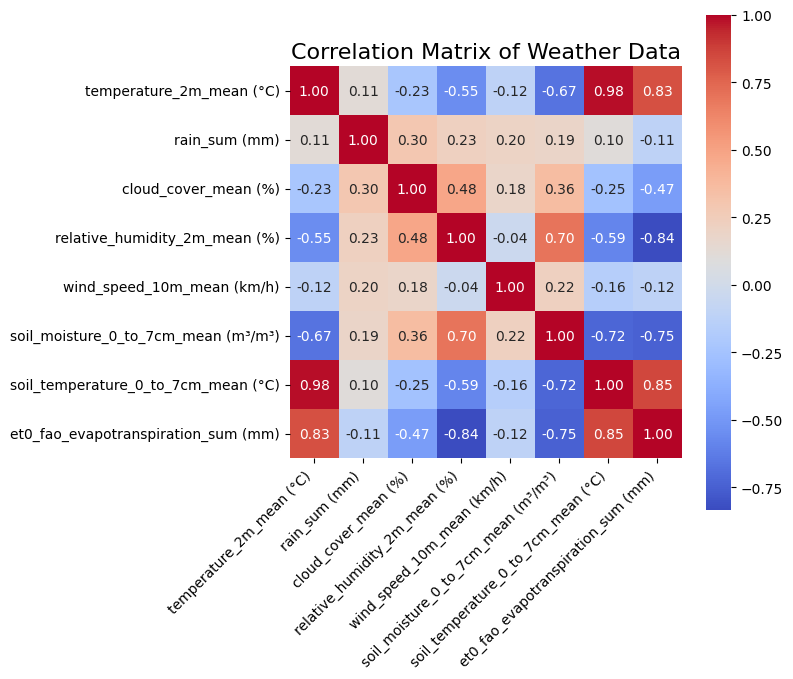

In [23]:
corr_matrix_daily = daily.corr(method='pearson')

plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix_daily, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Weather Data', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Plot các dữ liệu có độ tương quan phù hợp để huấn luyện với nhiệt độ

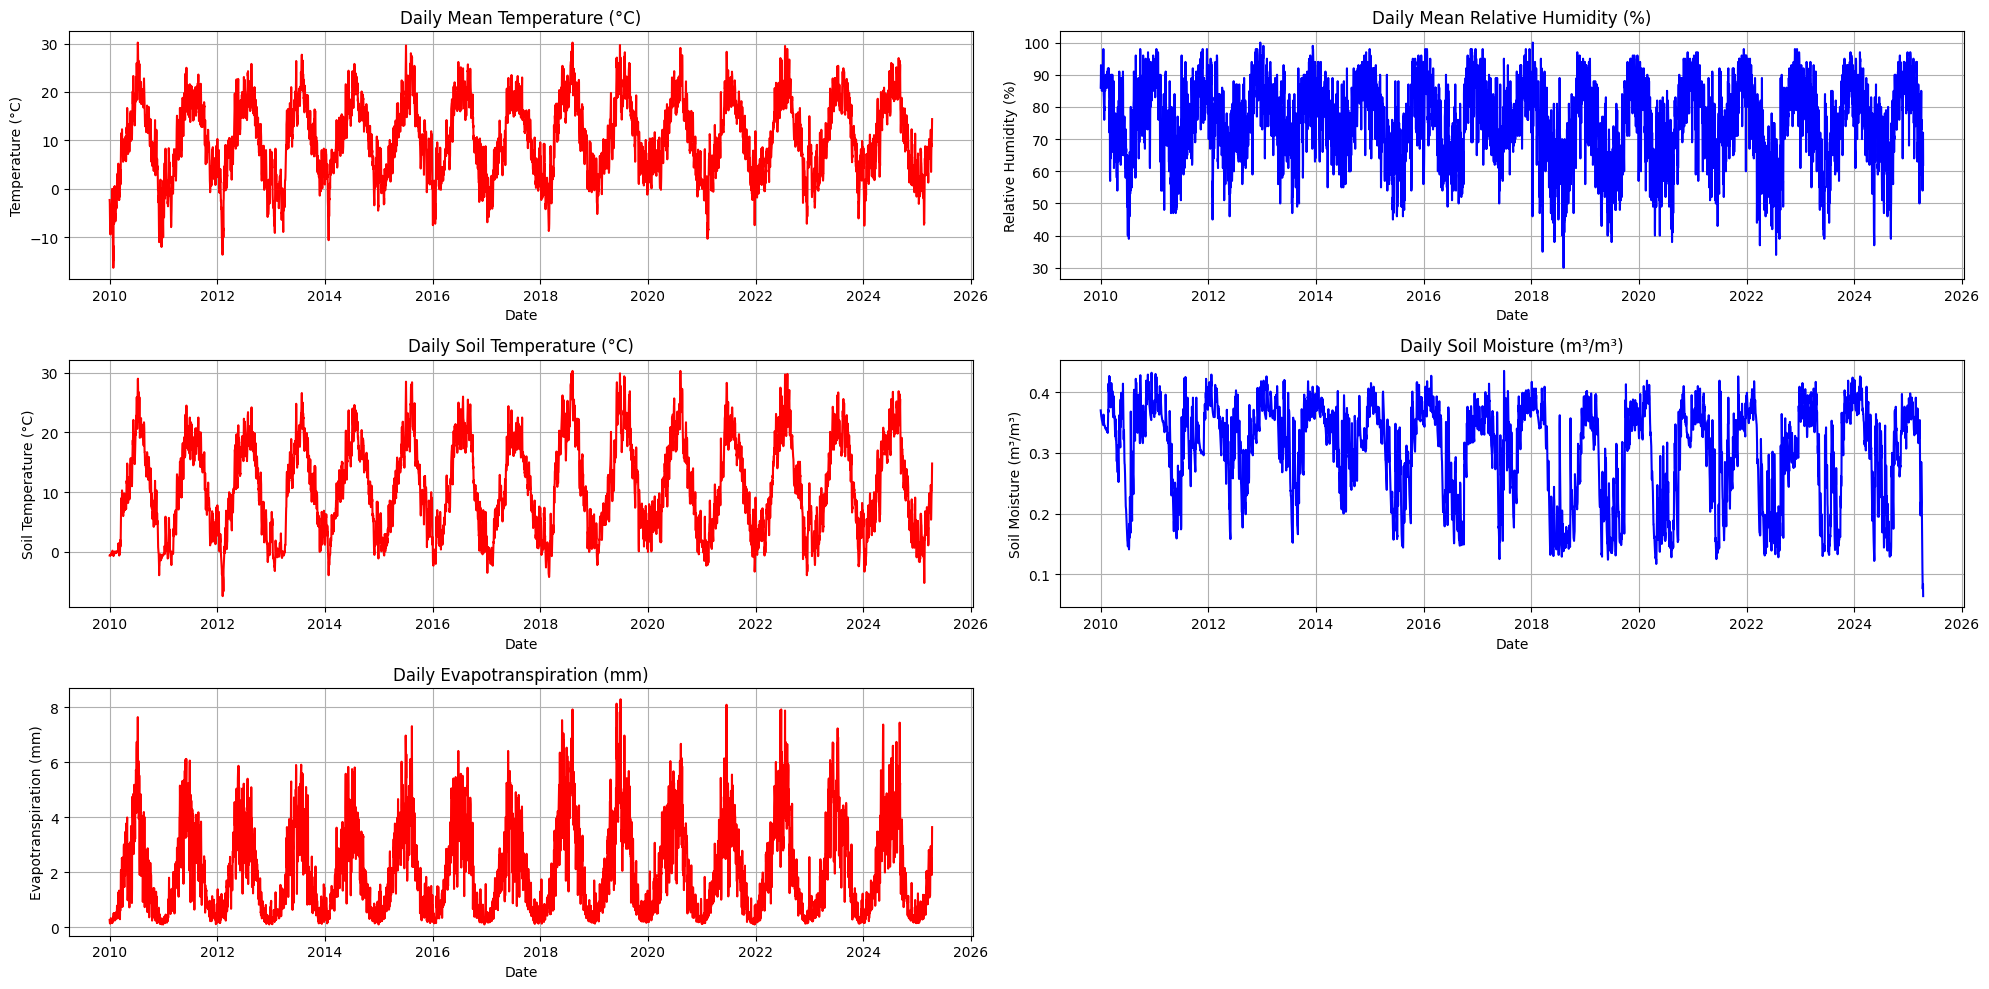

In [18]:
plt.figure(figsize=(20, 10))

plt.subplot(3, 2, 1)
plt.plot(daily['temperature_2m_mean (°C)'], label='Temperature (°C)', color='red')
plt.title('Daily Mean Temperature (°C)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid()

plt.subplot(3, 2, 2)
plt.plot(daily['relative_humidity_2m_mean (%)'], label='Relative Humidity (%)', color='blue')
plt.title('Daily Mean Relative Humidity (%)')
plt.xlabel('Date')
plt.ylabel('Relative Humidity (%)')
plt.grid()

plt.subplot(3, 2, 3)
plt.plot(daily['soil_temperature_0_to_7cm_mean (°C)'], label='Soil Temperature (°C)', color='red')
plt.title('Daily Soil Temperature (°C)')
plt.xlabel('Date')
plt.ylabel('Soil Temperature (°C)')
plt.grid()

plt.subplot(3, 2, 4)
plt.plot(daily['soil_moisture_0_to_7cm_mean (m³/m³)'], label='Soil Moisture (m³/m³)', color='blue')
plt.title('Daily Soil Moisture (m³/m³)')
plt.xlabel('Date')
plt.ylabel('Soil Moisture (m³/m³)')
plt.grid()

plt.subplot(3, 2, 5)
plt.plot(daily['et0_fao_evapotranspiration_sum (mm)'], label='Evapotranspiration (mm)', color='red')
plt.title('Daily Evapotranspiration (mm)')
plt.xlabel('Date')
plt.ylabel('Evapotranspiration (mm)')
plt.grid()

plt.tight_layout()
plt.show()

Plot các dữ liệu có độ tương quan phù hợp để huấn luyện với độ ẩm

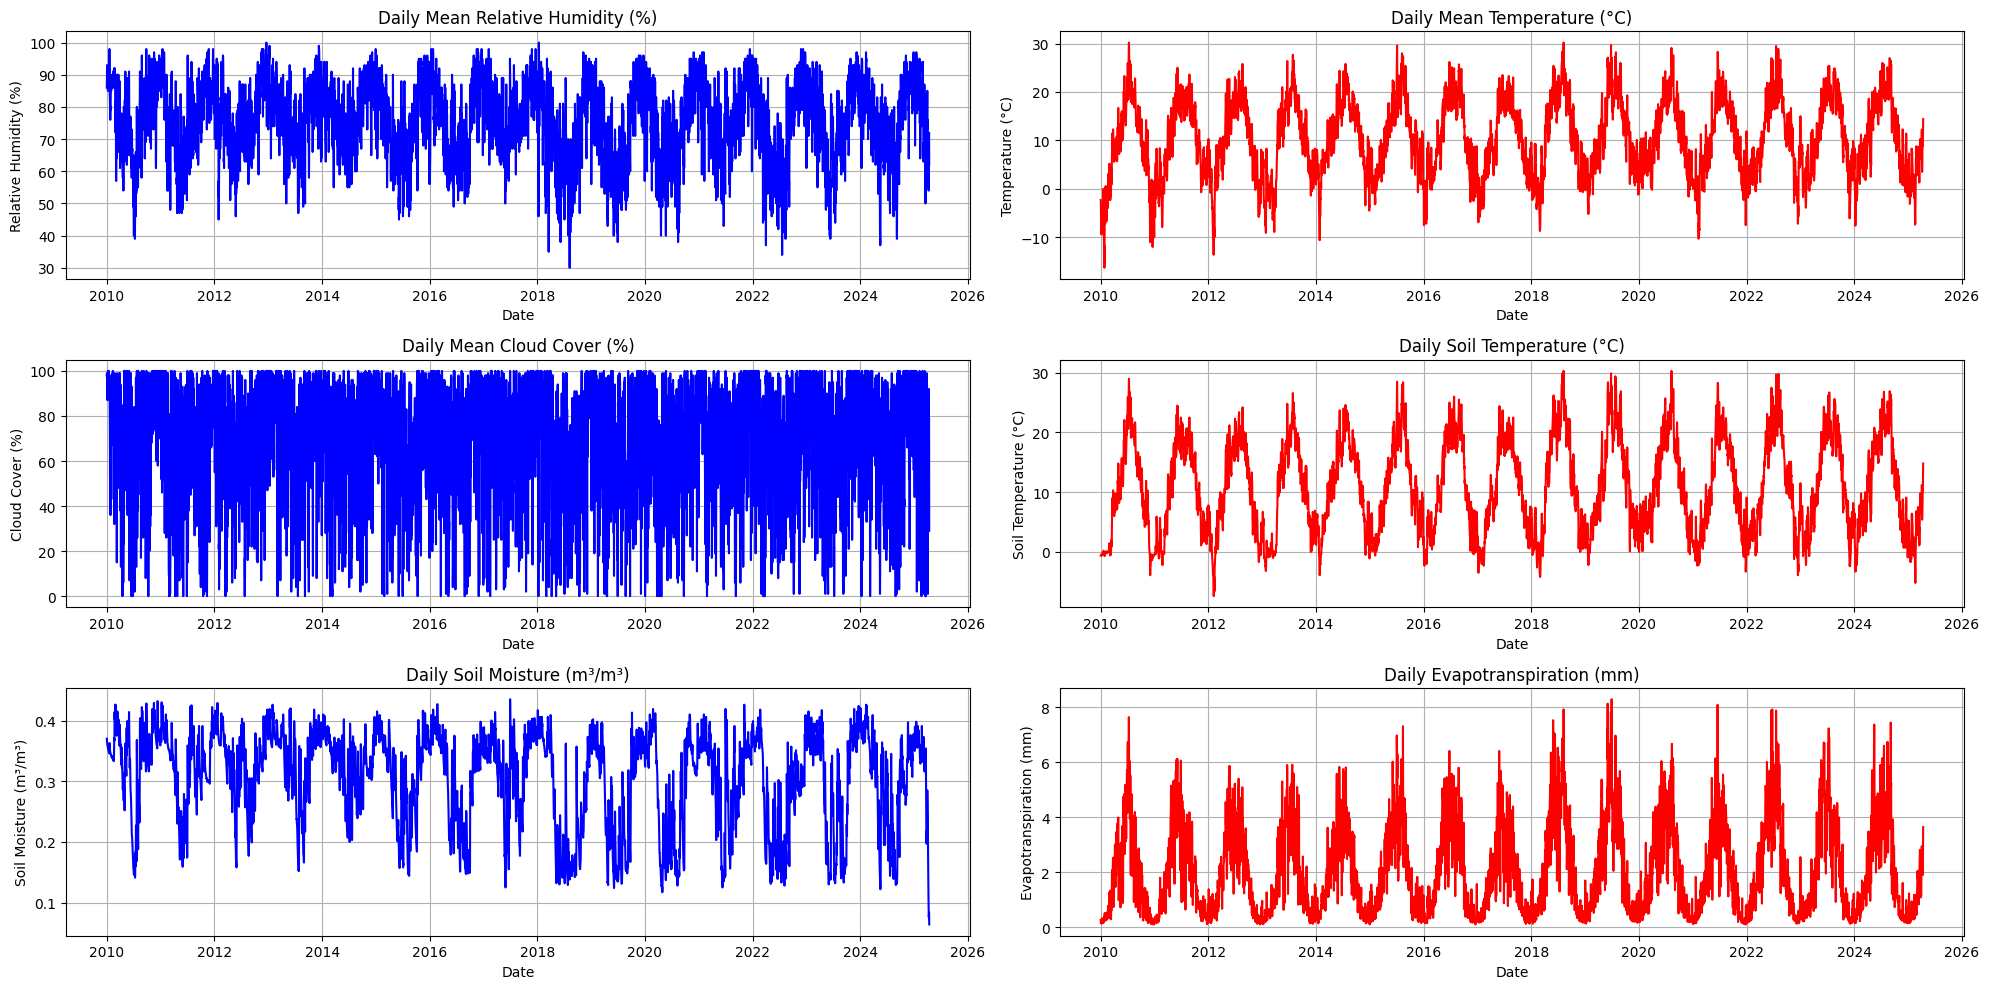

In [19]:
plt.figure(figsize=(20, 10))

plt.subplot(3, 2, 1)
plt.plot(daily['relative_humidity_2m_mean (%)'], label='Relative Humidity (%)', color='blue')
plt.title('Daily Mean Relative Humidity (%)')
plt.xlabel('Date')
plt.ylabel('Relative Humidity (%)')
plt.grid()

plt.subplot(3, 2, 2)
plt.plot(daily['temperature_2m_mean (°C)'], label='Temperature (°C)', color='red')
plt.title('Daily Mean Temperature (°C)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid()

plt.subplot(3, 2, 3)
plt.plot(daily['cloud_cover_mean (%)'], label='Cloud Cover (%)', color='blue')
plt.title('Daily Mean Cloud Cover (%)')
plt.xlabel('Date')
plt.ylabel('Cloud Cover (%)')
plt.grid()

plt.subplot(3, 2, 4)
plt.plot(daily['soil_temperature_0_to_7cm_mean (°C)'], label='Soil Temperature (°C)', color='red')
plt.title('Daily Soil Temperature (°C)')
plt.xlabel('Date')
plt.ylabel('Soil Temperature (°C)')
plt.grid()

plt.subplot(3, 2, 5)
plt.plot(daily['soil_moisture_0_to_7cm_mean (m³/m³)'], label='Soil Moisture (m³/m³)', color='blue')
plt.title('Daily Soil Moisture (m³/m³)')
plt.xlabel('Date')
plt.ylabel('Soil Moisture (m³/m³)')
plt.grid()

plt.subplot(3, 2, 6)
plt.plot(daily['et0_fao_evapotranspiration_sum (mm)'], label='Evapotranspiration (mm)', color='red')
plt.title('Daily Evapotranspiration (mm)')
plt.xlabel('Date')
plt.ylabel('Evapotranspiration (mm)')
plt.grid()

plt.tight_layout()
plt.show()

### Hourly data

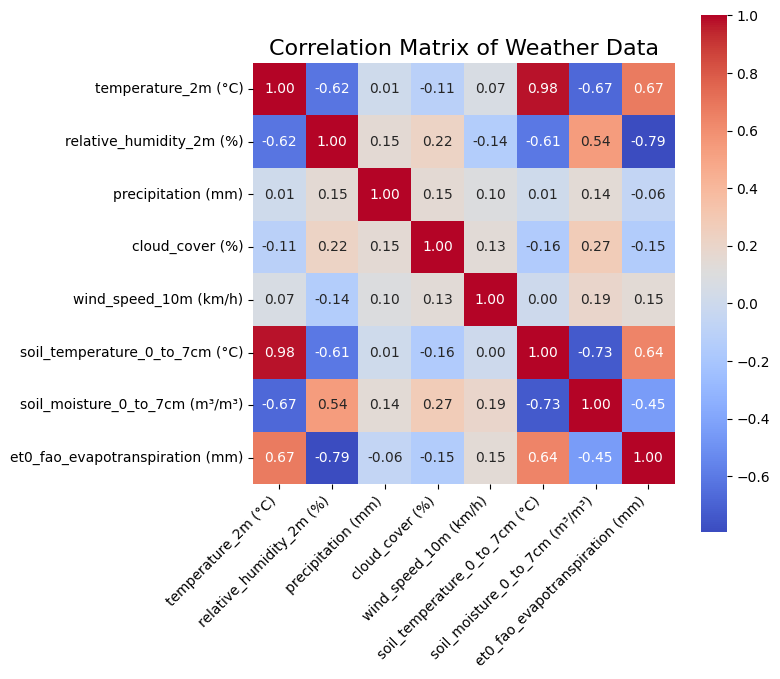

In [22]:
corr_matrix_hourly = hourly.corr(method='pearson')

plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix_hourly, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Weather Data', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Plot các dữ liệu có độ tương quan phù hợp để huấn luyện với nhiệt độ và độ ẩm

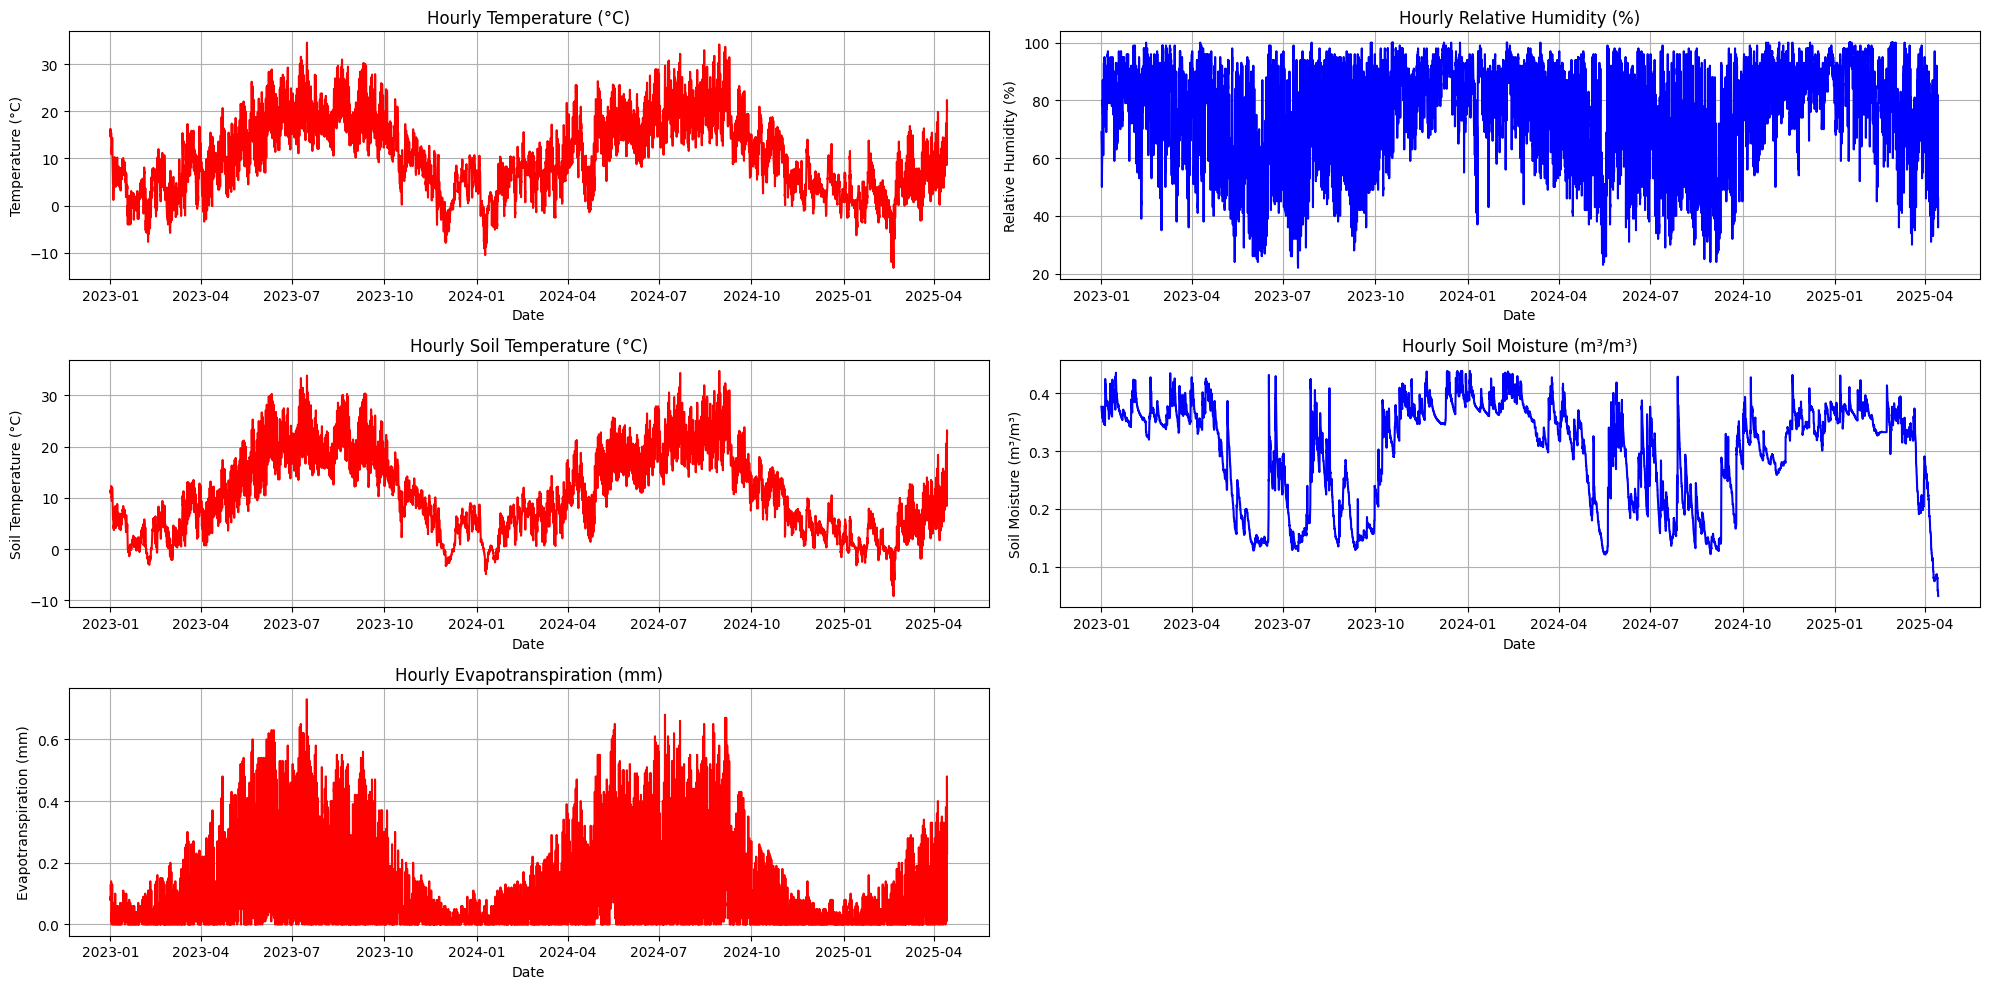

In [24]:
plt.figure(figsize=(20, 10))

plt.subplot(3, 2, 1)
plt.plot(hourly['temperature_2m (°C)'], label='Temperature (°C)', color='red')
plt.title('Hourly Temperature (°C)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid()

plt.subplot(3, 2, 2)
plt.plot(hourly['relative_humidity_2m (%)'], label='Relative Humidity (%)', color='blue')
plt.title('Hourly Relative Humidity (%)')
plt.xlabel('Date')
plt.ylabel('Relative Humidity (%)')
plt.grid()

plt.subplot(3, 2, 3)
plt.plot(hourly['soil_temperature_0_to_7cm (°C)'], label='Soil Temperature (°C)', color='red')
plt.title('Hourly Soil Temperature (°C)')
plt.xlabel('Date')
plt.ylabel('Soil Temperature (°C)')
plt.grid()

plt.subplot(3, 2, 4)
plt.plot(hourly['soil_moisture_0_to_7cm (m³/m³)'], label='Soil Moisture (m³/m³)', color='blue')
plt.title('Hourly Soil Moisture (m³/m³)')
plt.xlabel('Date')
plt.ylabel('Soil Moisture (m³/m³)')
plt.grid()

plt.subplot(3, 2, 5)
plt.plot(hourly['et0_fao_evapotranspiration (mm)'], label='Evapotranspiration (mm)', color='red')
plt.title('Hourly Evapotranspiration (mm)')
plt.xlabel('Date')
plt.ylabel('Evapotranspiration (mm)')
plt.grid()

plt.tight_layout()
plt.show()